In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AffinityPropagation
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("CreditDataset.csv")

In [3]:
data.head()

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   

   Credit amount  Duration              Purpose  
0           1169         6             radio/TV  
1           5951        48             radio/TV  
2           2096        12            education  
3           7882        42  furniture/equipment  
4           4870        24                  car

In [4]:
data.drop(data.columns[0], inplace=True, axis=1)
print("Database has {} obserwations (customers) and {} columns (attributes).".format(data.shape[0],data.shape[1]))
print("Missing values in each column:\n{}".format(data.isnull().sum()))
print("Columns data types:\n{}".format(data.dtypes))

Database has 1000 obserwations (customers) and 9 columns (attributes).
Missing values in each column:
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64
Columns data types:
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object


In [5]:
n_unique = data.nunique()
print("Number of unique values:\n{}".format(n_unique))

Number of unique values:
Age                  53
Sex                   2
Job                   4
Housing               3
Saving accounts       4
Checking account      3
Credit amount       921
Duration             33
Purpose               8
dtype: int64


In [6]:
print("Unique values in each categorical column:")
for col in data.select_dtypes(include=[object]):
    print(col,":", data[col].unique())

Unique values in each categorical column:
Sex : ['male' 'female']
Housing : ['own' 'free' 'rent']
Saving accounts : [nan 'little' 'quite rich' 'rich' 'moderate']
Checking account : ['little' 'moderate' nan 'rich']
Purpose : ['radio/TV' 'education' 'furniture/equipment' 'car' 'business'
 'domestic appliances' 'repairs' 'vacation/others']


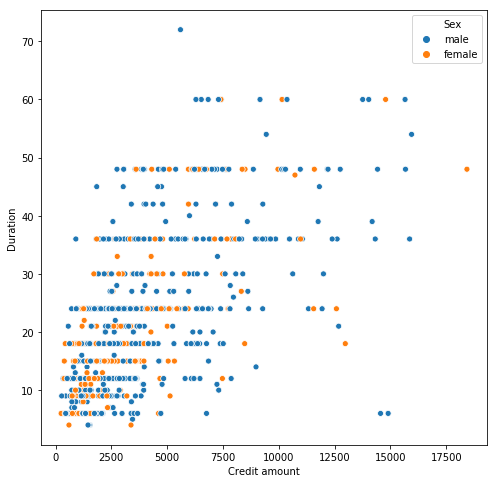

In [7]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x="Credit amount",y="Duration", hue="Sex", palette=None, data=data)

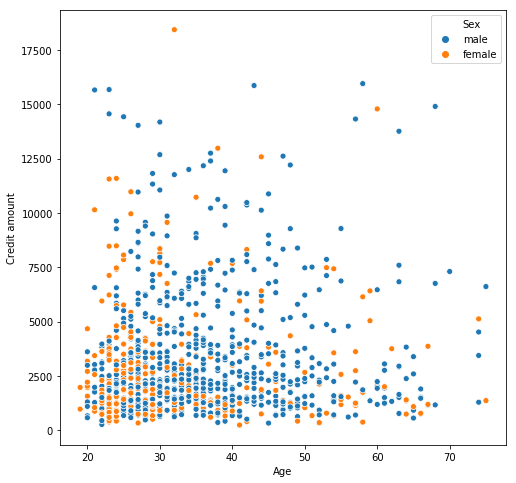

In [8]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x="Age",y="Credit amount", hue="Sex", palette=None, data=data)

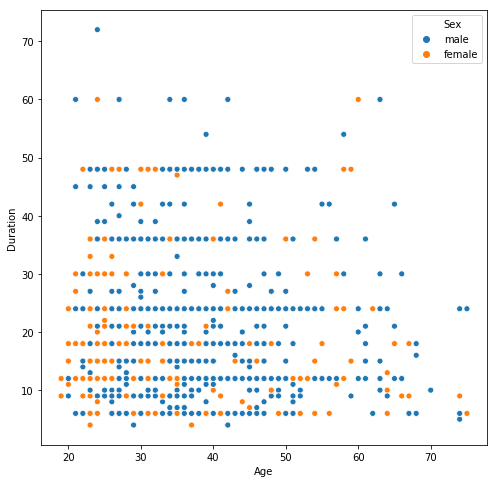

In [9]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x="Age",y="Duration", hue="Sex", palette=None, data=data)

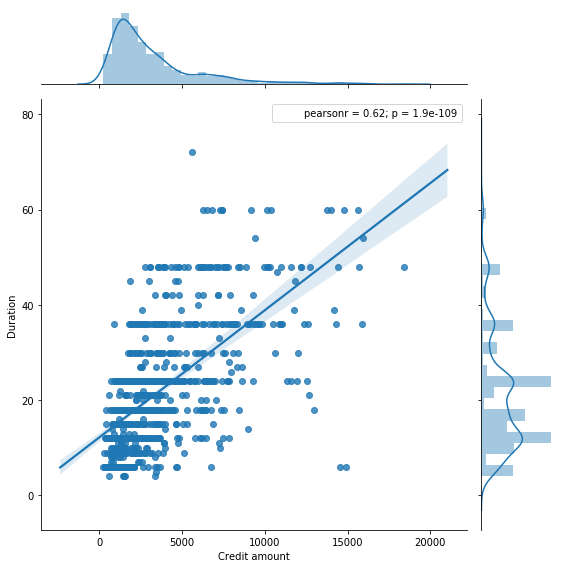

In [10]:
import scipy.stats as stats
r1 = sns.jointplot(x="Credit amount",y="Duration", data=data, kind="reg", height=8)
r1.annotate(stats.pearsonr)
plt.show()

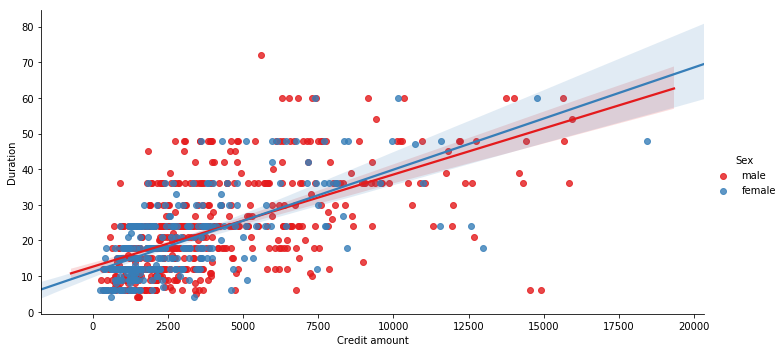

In [11]:
sns.lmplot(x="Credit amount",y="Duration", hue="Sex", data=data, palette="Set1", aspect=2)
plt.show()

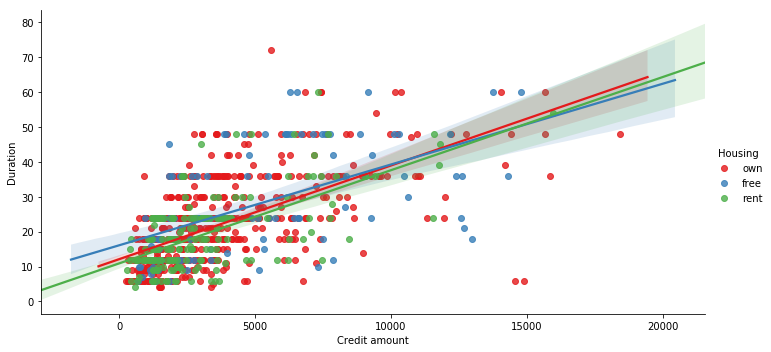

In [12]:
sns.lmplot(x="Credit amount",y="Duration", hue="Housing", data=data, palette="Set1", aspect=2)
plt.show()

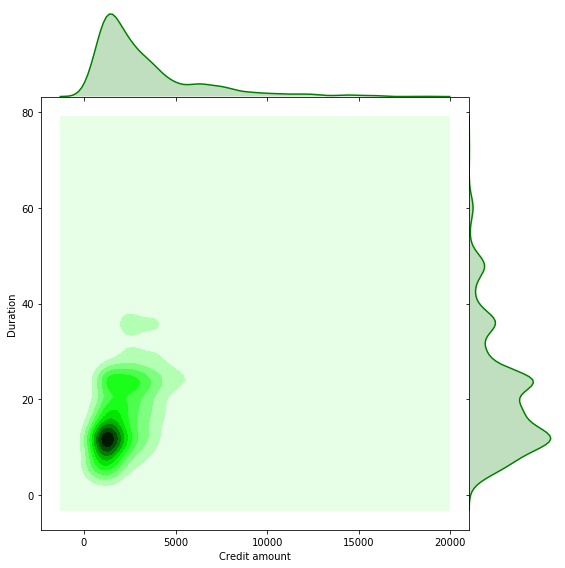

In [13]:
sns.jointplot("Credit amount","Duration", data=data, kind="kde", space=0, color="g",  height=8)
plt.show()

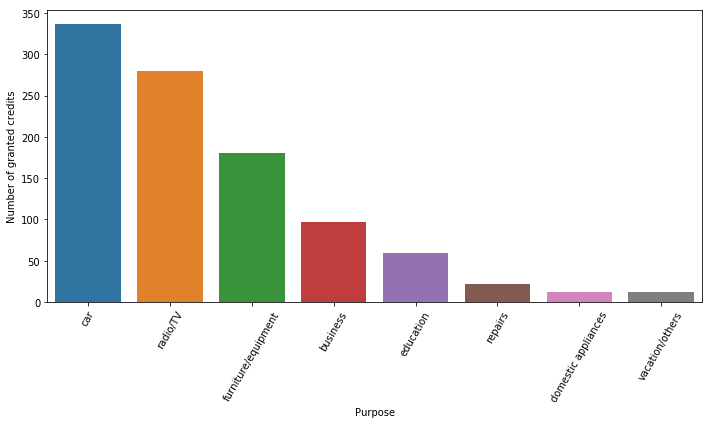

In [14]:
n_credits = data.groupby("Purpose")["Age"].count().rename("Count").reset_index()
n_credits.sort_values(by=["Count"], ascending=False, inplace=True)

plt.figure(figsize=(10,6))
bar = sns.barplot(x="Purpose",y="Count",data=n_credits)
bar.set_xticklabels(bar.get_xticklabels(), rotation=60)
plt.ylabel("Number of granted credits")
plt.tight_layout()

In [15]:
def boxes(x,y,h,r=45):
    fig, ax = plt.subplots(figsize=(10,6))
    box = sns.boxplot(x=x,y=y, hue=h, data=data)
    box.set_xticklabels(box.get_xticklabels(), rotation=r)
    fig.subplots_adjust(bottom=0.2)
    plt.tight_layout()

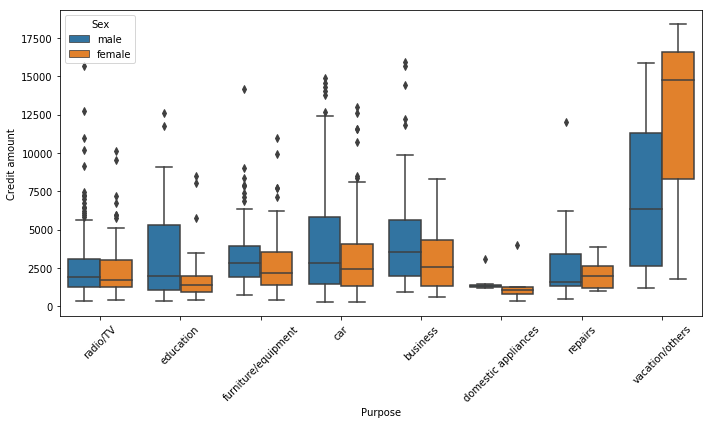

In [16]:
boxes("Purpose","Credit amount","Sex")

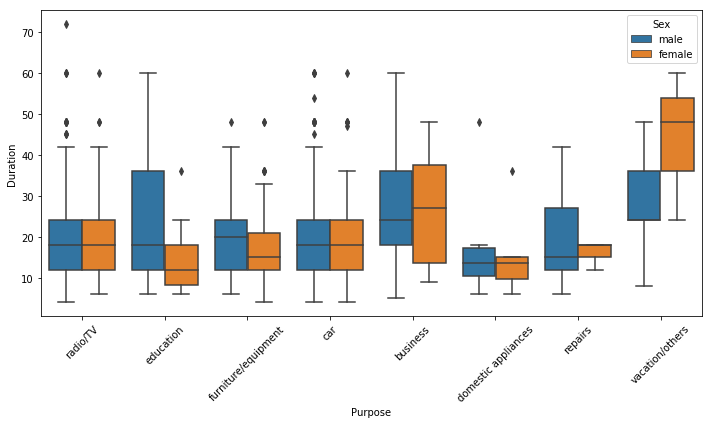

In [17]:
boxes("Purpose","Duration","Sex")

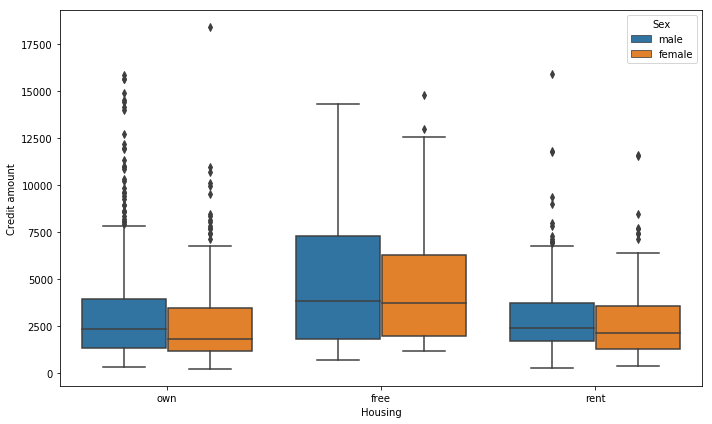

In [18]:
boxes("Housing","Credit amount","Sex",r=0)

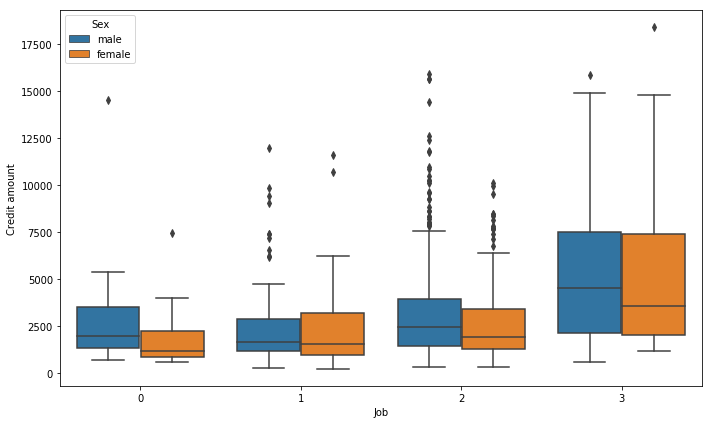

In [19]:
boxes("Job","Credit amount","Sex",r=0)

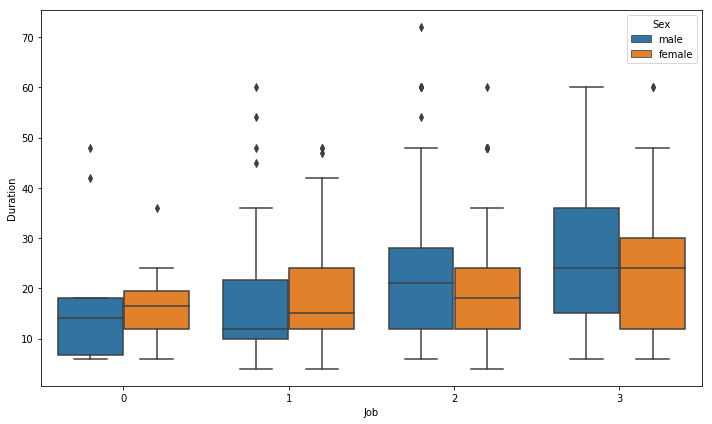

In [20]:
boxes("Job","Duration","Sex",r=0)

Text(0.5, 0, 'Age')

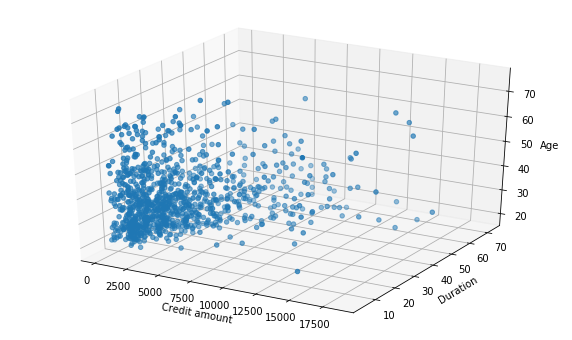

In [21]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(data["Credit amount"], data["Duration"], data["Age"])
ax.set_xlabel("Credit amount")
ax.set_ylabel("Duration")
ax.set_zlabel("Age")

In [22]:
selected_cols = ["Age","Credit amount", "Duration"]
cluster_data = data.loc[:,selected_cols]

In [23]:
def distributions(df):
    fig, (ax1, ax2, ax3) = plt.subplots(3,1, figsize=(8,8))
    sns.distplot(df["Age"], ax=ax1)
    sns.distplot(df["Credit amount"], ax=ax2)
    sns.distplot(df["Duration"], ax=ax3)
    plt.tight_layout()

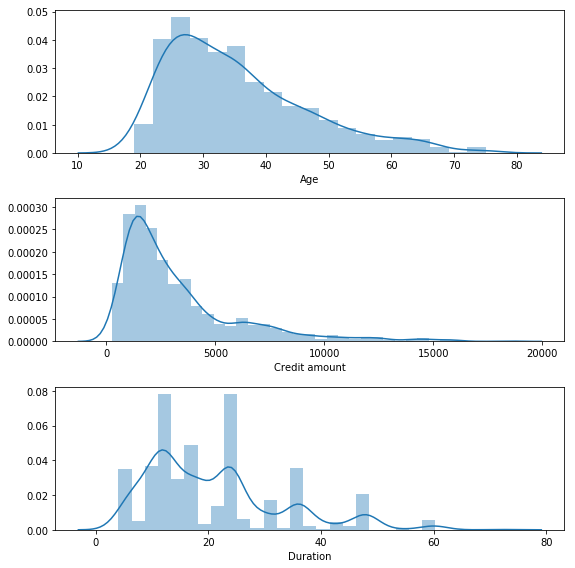

In [24]:
distributions(cluster_data)

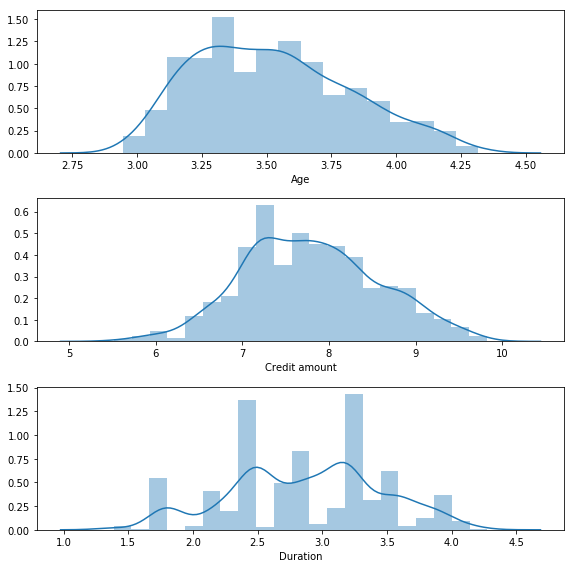

In [25]:
cluster_log = np.log(cluster_data)
distributions(cluster_log)

In [26]:
scaler = StandardScaler()
cluster_scaled = scaler.fit_transform(cluster_log)

In [27]:
#me

In [28]:
cluster_log

Age  Credit amount  Duration
0    4.204693       7.063904  1.791759
1    3.091042       8.691315  3.871201
2    3.891820       7.647786  2.484907
3    3.806662       8.972337  3.737670
4    3.970292       8.490849  3.178054
5    3.555348       9.111072  3.583519
6    3.970292       7.949797  3.178054
7    3.555348       8.846209  3.583519
8    4.110874       8.025843  2.484907
9    3.332205       8.562931  3.401197
10   3.218876       7.166266  2.484907
11   3.178054       8.368229  3.871201
12   3.091042       7.356918  2.484907
13   4.094345       7.089243  3.178054
14   3.332205       7.246368  2.708050
15   3.465736       7.156177  3.178054
16   3.970292       7.793174  3.178054
17   3.218876       8.996157  3.401197
18   3.784190       9.439784  3.178054
19   3.433987       8.140316  3.178054
20   3.871201       7.665753  2.197225
21   3.784190       7.881182  1.791759
22   3.871201       7.714677  2.302585
23   3.784190       7.497762  2.484907
24   3.258097       7.634821  2.302585
25   3.583519       7.225481  1.791759
26   3.663562       6.054439  1.791759
27   3.737670       6.013715  2.484907
28   3.526361       7.789455  1.945910
29   4.143135       8.829958  4.094345
..        ...            ...       ...
970  3.091042       7.322510  2.708050
971  3.761200       8.908289  3.178054
972  3.367296       7.084226  3.178054
973  3.583519       8.895219  4.094345
974  3.496508       7.948385  3.401197
975  4.043051       7.137278  3.178054
976  4.158883       6.624065  1.791759
977  3.737670       7.794411  2.890372
978  3.850148       7.839132  3.178054
979  3.218876       7.142037  2.708050
980  3.891820       9.034319  3.401197
981  3.496508       8.485496  3.871201
982  3.332205       7.980366  3.044522
983  3.258097       9.015420  3.583519
984  3.401197       7.614805  3.178054
985  3.218876       7.267525  2.708050
986  3.496508       8.746557  3.737670
987  4.158883       7.250636  2.564949
988  3.367296       8.791638  3.178054
989  3.871201       7.463363  3.178054
990  3.610918       8.178919  2.484907
991  3.526361       7.358194  2.708050
992  3.135494       7.568379  2.890372
993  3.401197       8.283747  3.583519
994  3.912023       7.779049  2.484907
995  3.433987       7.459339  2.484907
996  3.688879       8.257645  3.401197
997  3.637586       6.689599  2.484907
998  3.135494       7.520235  3.806662
999  3.295837       8.428581  3.806662

[1000 rows x 3 columns]

In [29]:
cluster_scaled

array([[ 2.27100592, -0.933901  , -1.86486906],
       [-1.44615223,  1.16304581,  1.7083687 ],
       [ 1.22669602, -0.1815588 , -0.67378981],
       ...,
       [ 0.37810951, -1.4161991 , -0.67378981],
       [-1.29778048, -0.34591111,  1.59746802],
       [-0.76258638,  0.82450846,  1.59746802]])

In [30]:
cluster_scaled_df = pd.DataFrame(cluster_scaled, columns=["Age", "Credit amount", "Duration"])

In [31]:
cluster_scaled_df

Age  Credit amount  Duration
0    2.271006      -0.933901 -1.864869
1   -1.446152       1.163046  1.708369
2    1.226696      -0.181559 -0.673790
3    0.942455       1.525148  1.478913
4    1.488620       0.904743  0.517289
5    0.103614       1.703911  1.214026
6    1.488620       0.207588  0.517289
7    0.103614       1.362630  1.214026
8    1.957856       0.305575 -0.673790
9   -0.641198       0.997621  0.900731
10  -1.019468      -0.802006 -0.673790
11  -1.155724       0.746745  1.708369
12  -1.446152      -0.556347 -0.673790
13   1.902685      -0.901251  0.517289
14  -0.641198      -0.698793 -0.290348
15  -0.195495      -0.815006  0.517289
16   1.488620       0.005777  0.517289
17  -1.019468       1.555840  0.900731
18   0.867445       2.127462  0.517289
19  -0.301466       0.453074  0.517289
20   1.157873      -0.158408 -1.168132
21   0.867445       0.119176 -1.864869
22   1.157873      -0.095368 -0.987085
23   0.867445      -0.374868 -0.673790
24  -0.888557      -0.198265 -0.987085
25   0.197643      -0.725706 -1.864869
26   0.464811      -2.234614 -1.864869
27   0.712170      -2.287088 -0.673790
28   0.006859       0.000984 -1.599982
29   2.065537       1.341690  2.091811
..        ...            ...       ...
970 -1.446152      -0.600682 -0.290348
971  0.790710       1.442621  0.517289
972 -0.524070      -0.907715  0.517289
973  0.197643       1.425780  2.091811
974 -0.092785       0.205769  0.900731
975  1.731477      -0.839357  0.517289
976  2.118102      -1.500641 -1.864869
977  0.712170       0.007370  0.022947
978  1.087600       0.064993  0.517289
979 -1.019468      -0.833226 -0.290348
980  1.226696       1.605013  0.900731
981 -0.092785       0.897845  1.708369
982 -0.641198       0.246976  0.287834
983 -0.888557       1.580661  1.214026
984 -0.410912      -0.224055  0.517289
985 -1.019468      -0.671531 -0.290348
986 -0.092785       1.234227  1.478913
987  2.118102      -0.693294 -0.536247
988 -0.524070       1.292314  0.517289
989  1.157873      -0.419191  0.517289
990  0.289096       0.502816 -0.673790
991  0.006859      -0.554703 -0.290348
992 -1.297780      -0.283876  0.022947
993 -0.410912       0.637888  1.214026
994  1.294129      -0.012425 -0.673790
995 -0.301466      -0.424376 -0.673790
996  0.549317       0.604255  0.900731
997  0.378110      -1.416199 -0.673790
998 -1.297780      -0.345911  1.597468
999 -0.762586       0.824508  1.597468

[1000 rows x 3 columns]

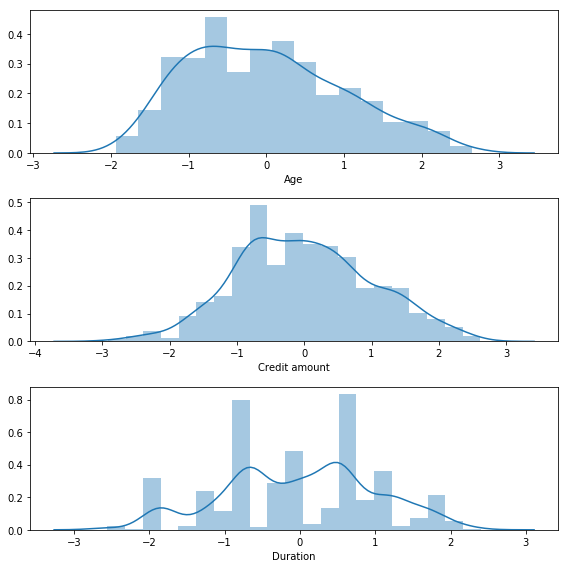

In [32]:
distributions(cluster_scaled_df)

In [33]:
#me over

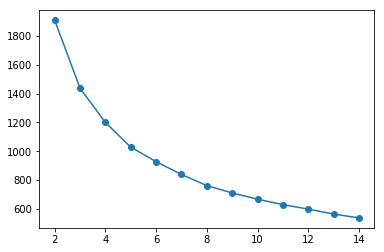

In [34]:
clusters_range = [2,3,4,5,6,7,8,9,10,11,12,13,14]
inertias =[]

for c in clusters_range:
    kmeans = KMeans(n_clusters=c, random_state=0).fit(cluster_scaled)
    inertias.append(kmeans.inertia_)

plt.figure()
plt.plot(clusters_range,inertias, marker='o')

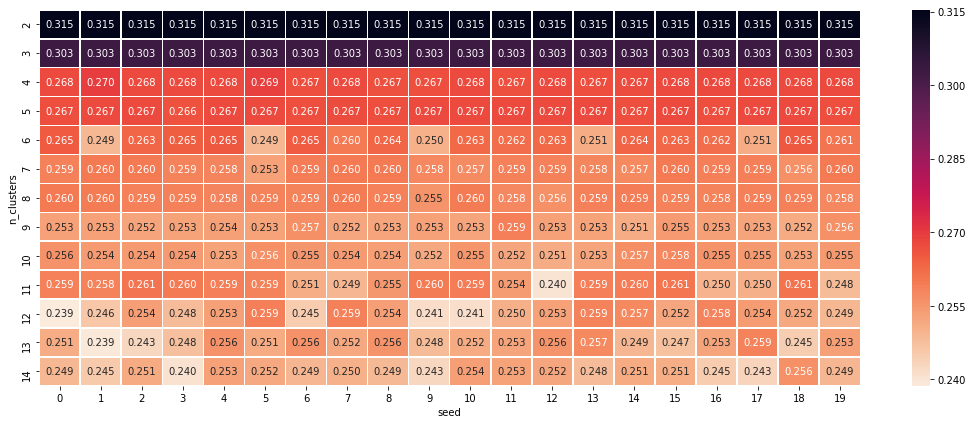

In [35]:
from sklearn.metrics import silhouette_samples, silhouette_score

clusters_range = range(2,15)
random_range = range(0,20)
results =[]
for c in clusters_range:
    for r in random_range:
        clusterer = KMeans(n_clusters=c, random_state=r)
        cluster_labels = clusterer.fit_predict(cluster_scaled)
        silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
        #print("For n_clusters =", c," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)
        results.append([c,r,silhouette_avg])

result = pd.DataFrame(results, columns=["n_clusters","seed","silhouette_score"])
pivot_km = pd.pivot_table(result, index="n_clusters", columns="seed",values="silhouette_score")

plt.figure(figsize=(15,6))
sns.heatmap(pivot_km, annot=True, linewidths=.5, fmt='.3f', cmap=sns.cm.rocket_r)
plt.tight_layout()

In [36]:
kmeans_sel = KMeans(n_clusters=3, random_state=1).fit(cluster_scaled)
labels = pd.DataFrame(kmeans_sel.labels_)
clustered_data = cluster_data.assign(Cluster=labels)

For n_clusters = 3  and seed = 19 
The average silhouette_score is : 0.302902483090709


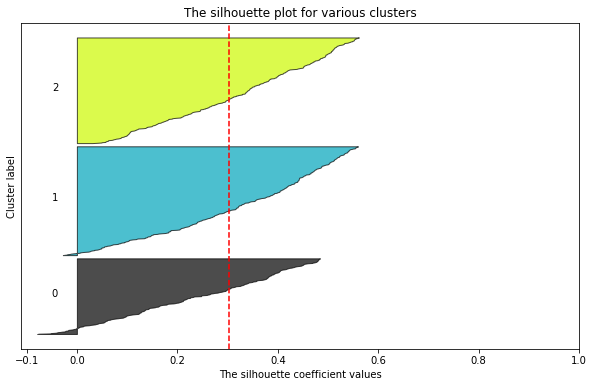

In [37]:
import matplotlib.cm as cm

clusterer = KMeans(n_clusters=3, random_state=1)
cluster_labels = clusterer.fit_predict(cluster_scaled)
silhouette_avg = silhouette_score(cluster_scaled, cluster_labels)
print("For n_clusters =", 3," and seed =", r,  "\nThe average silhouette_score is :", silhouette_avg)


sample_silhouette_values = silhouette_samples(cluster_scaled, cluster_labels)

fig, ax1 = plt.subplots(figsize=(10,6))

y_lower = 10
for i in range(3):
    
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i
    
    color = cm.nipy_spectral(float(i) / 3)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values, facecolor=color, edgecolor="black", alpha=0.7)
    
    
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
    
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.get_yaxis().set_ticks([])
ax1.set_title("The silhouette plot for various clusters")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

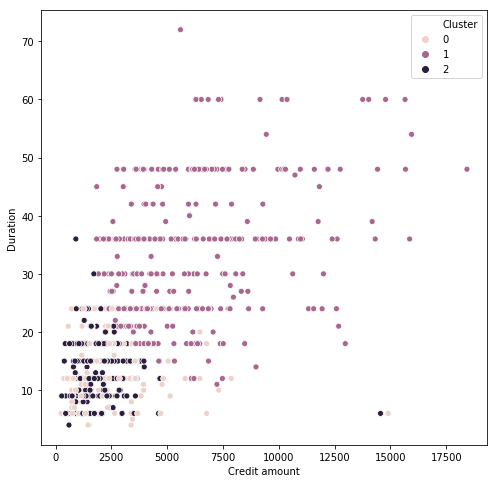

In [38]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x="Credit amount",y="Duration", hue="Cluster", palette=None, data=clustered_data)

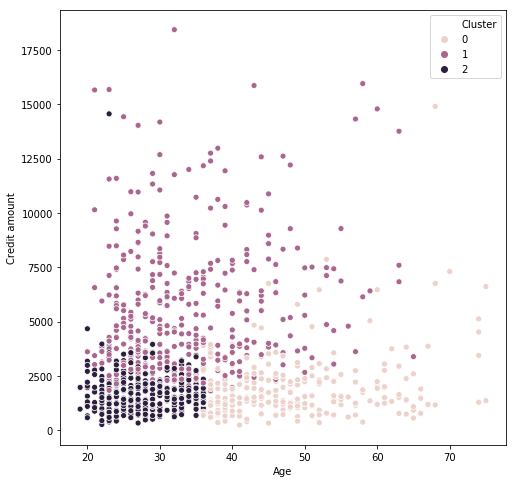

In [39]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x="Age",y="Credit amount", hue="Cluster", palette=None, data=clustered_data)

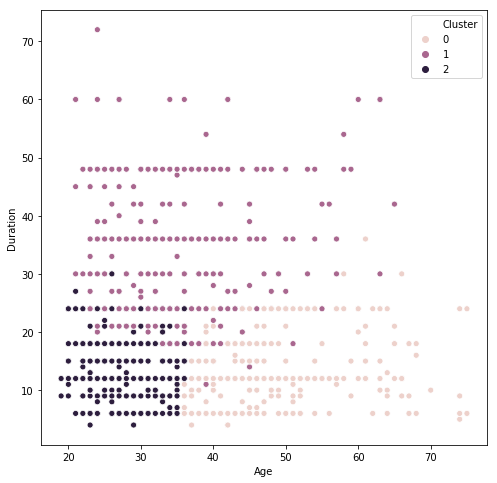

In [40]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x="Age",y="Duration", hue="Cluster", palette=None, data=clustered_data)

In [41]:
grouped_km = clustered_data.groupby(['Cluster']).mean().round(1)
grouped_km

Age  Credit amount  Duration
Cluster                               
0        48.6         1970.5      13.9
1        34.0         5665.4      32.2
2        27.7         1737.5      14.3

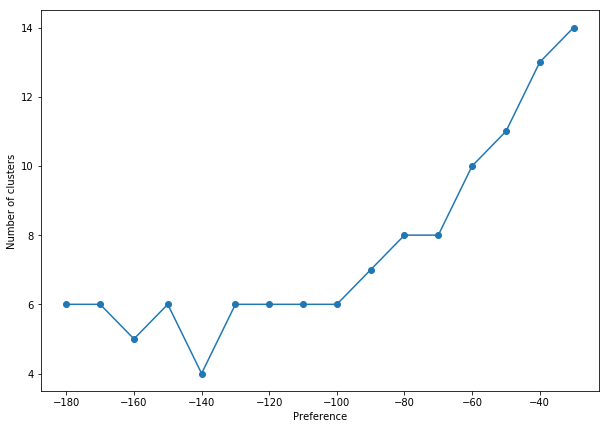

In [42]:
preferences = np.arange(-30,-190,-10)
clusters = []

for p in preferences:
    af = AffinityPropagation(preference=p, damping=0.6, max_iter=400, verbose=False).fit(cluster_scaled)
    labels_af = pd.DataFrame(af.labels_)
    clusters.append(len(af.cluster_centers_indices_))

plt.figure(figsize=(10,7))
plt.xlabel("Preference")
plt.ylabel("Number of clusters")
plt.plot(preferences,clusters, marker='o')


In [43]:
af = AffinityPropagation(preference=-140, damping=0.6, verbose=False).fit(cluster_scaled)
labels_af = pd.DataFrame(af.labels_)
n_clusters_ = len(af.cluster_centers_indices_)

clustered_data_af = cluster_data.assign(Cluster=labels_af)
scatters = (clustered_data_af,'Cluster')

grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)


In [44]:
grouped_af = clustered_data_af.groupby(['Cluster']).mean().round(1)
grouped_af

Age  Credit amount  Duration
Cluster                               
0        28.7         5593.7      32.2
1        27.9         1654.3      15.1
2        46.0         1551.7      10.7
3        47.5         4977.9      27.6

In [45]:
#me

In [46]:
cluster_scaled.shape

(1000, 3)

In [47]:
labels_af[0:5]

0
0  2
1  0
2  2
3  3
4  3

In [48]:
af.cluster_centers_

array([[-0.64119792,  0.99762148,  0.90073132],
       [-0.64119792, -0.69879282, -0.29034793],
       [ 0.94245501, -0.80999041, -0.98708463],
       [ 1.15787265,  0.759542  ,  0.51728944]])

In [49]:
cluster_data[0:5]

Age  Credit amount  Duration
0   67           1169         6
1   22           5951        48
2   49           2096        12
3   45           7882        42
4   53           4870        24

In [50]:
clustered_data_af[0:5]

Age  Credit amount  Duration  Cluster
0   67           1169         6        2
1   22           5951        48        0
2   49           2096        12        2
3   45           7882        42        3
4   53           4870        24        3

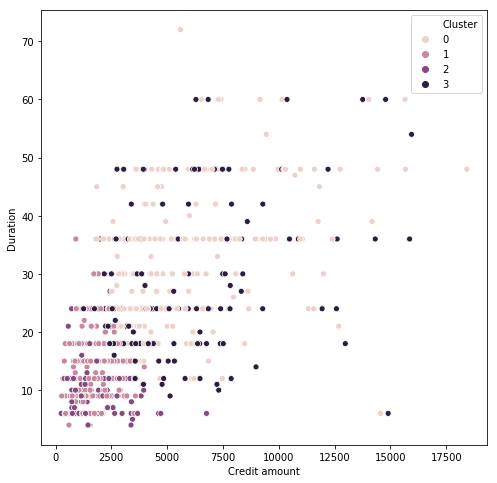

In [51]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x="Credit amount",y="Duration", hue="Cluster", palette=None, data=clustered_data_af)

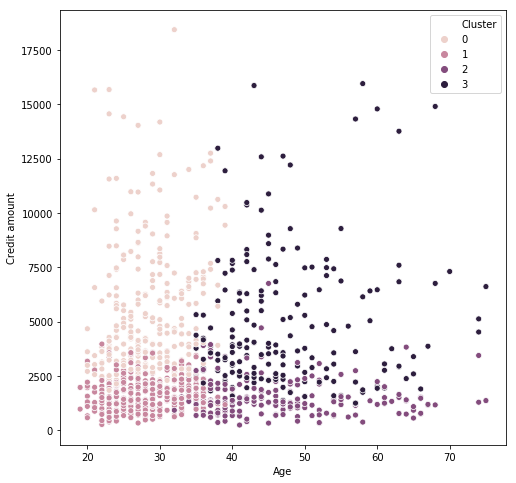

In [52]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x="Age",y="Credit amount", hue="Cluster", palette=None, data=clustered_data_af)

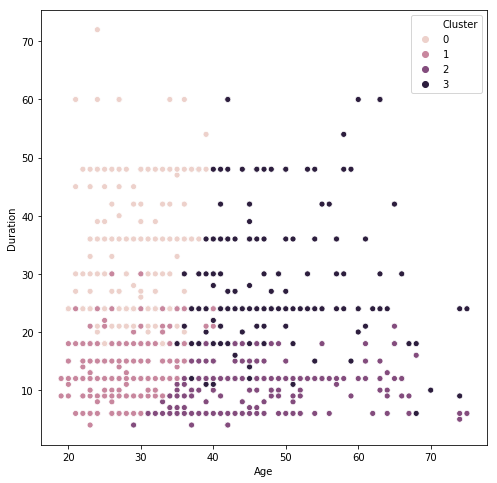

In [53]:
fig, (ax1) = plt.subplots(1,1, figsize=(8,8))
sns.scatterplot(x="Age",y="Duration", hue="Cluster", palette=None, data=clustered_data_af)

In [54]:
import plotly.express as px

In [55]:
fig = px.scatter_3d(clustered_data, x='Age', y='Credit amount', z='Duration', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

In [56]:
print("Cluster-0 [Blue]", "Maybe (Moderately Risky Credit)\nCluster-1 [Pink]", 
      "Don't Allow Credit (Potential Credit Defaulter)\nCluster-2 [Yellow]", "Allow Credit (Safe Credit)")
fig = px.scatter_3d(clustered_data, x='Age', y='Credit amount', z='Duration',
              color='Cluster', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Cluster-0 [Blue] Maybe (Moderately Risky Credit)
Cluster-1 [Pink] Don't Allow Credit (Potential Credit Defaulter)
Cluster-2 [Yellow] Allow Credit (Safe Credit)


In [57]:
print("Cluster-0 [Blue]", "Maybe (More Risky Credit)\nCluster-1 [Purple]", "Allow Credit (Safe Credit)\nCluster-2 [Orange]",
      "Allow Credit (Less Risky Credit)\nCluster-3 [Yellow]", "Don't Allow Credit (Risky Credit)")
fig = px.scatter_3d(clustered_data_af, x='Age', y='Credit amount', z='Duration',
              color='Cluster', opacity=0.7)
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

Cluster-0 [Blue] Maybe (More Risky Credit)
Cluster-1 [Purple] Allow Credit (Safe Credit)
Cluster-2 [Orange] Allow Credit (Less Risky Credit)
Cluster-3 [Yellow] Don't Allow Credit (Risky Credit)


In [58]:
#new input data testing 

In [59]:
scaler

StandardScaler(copy=True, with_mean=True, with_std=True)

In [60]:
clusterer

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [61]:
af

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.6, max_iter=200, preference=-140, verbose=False)

In [62]:
def kmeansPredict(data):
    tdata =  inputTransform(data, scaler)
    clusterV = clusterer.predict(np.array(tdata).reshape(1, -1))
    if clusterV == 0: return [0,"Cluster-0 [Blue]", "Maybe (Moderately Risky Credit)"]
    elif clusterV == 1: return [1,"Cluster-1 [Pink]", "Don't Allow Credit (Potential Credit Defaulter)"]
    elif clusterV == 2: return [2,"Cluster-2 [Yellow]", "Allow Credit (Safe Credit)"]
    return -1

In [63]:
def AFPredict(data):
    clusterV = clusterer.predict(np.array(data).reshape(1, -1))
    if clusterV == 0: return [0,"Cluster-0 [Blue]", "Maybe (More Risky Credit)"]
    elif clusterV == 1: return [1,"Cluster-1 [Purple]", "Allow Credit (Safe Credit)"]
    elif clusterV == 2: return [2,"Cluster-2 [Orange]", "Allow Credit (Less Risky Credit)"]
    elif clusterV == 3: return [3,"Cluster-3 [Yellow]", "Don't Allow Credit (Risky Credit)"]
    return -1

In [64]:
def consensusFunction(data):
    kml = kmeansPredict(data)[0]
    afl = AFPredict(data)[0]
    if kml==-1 or afl==-1:
        return -1
    kmeans_coeff = [50, 5, 100]
    af_coeff = [20, 100, 70, 5]
    kmeans_weight = 4
    af_weight = 6
    total_weights = kmeans_weight+af_weight
    prob = (kmeans_weight*kmeans_coeff[kml]+af_weight*af_coeff[afl])/total_weights
    return str(100-prob)+"% chance of Credit Defaulting"

In [65]:
def clusterEnsemble(data):
    print("Kmeans only: {}\nAffinity propagation only: {}\nCluster Ensemble Output: {}".format(
        kmeansPredict(data), AFPredict(data), consensusFunction(data)))

In [66]:
def inputTransform(data, scaler):
    data = np.log(data)
    data = scaler.transform(np.array(data).reshape(1,-1))
    return data

In [67]:
#["Age", "Credit amount", "Duration"]
data = [25, 2631, 15]
clusterEnsemble(data)

Kmeans only: [2, 'Cluster-2 [Yellow]', 'Allow Credit (Safe Credit)']
Affinity propagation only: [1, 'Cluster-1 [Purple]', 'Allow Credit (Safe Credit)']
Cluster Ensemble Output: 0.0% chance of Credit Defaulting


In [68]:
#["Age", "Credit amount", "Duration"]
data = [70, 2500, 12]
clusterEnsemble(data)

Kmeans only: [0, 'Cluster-0 [Blue]', 'Maybe (Moderately Risky Credit)']
Affinity propagation only: [1, 'Cluster-1 [Purple]', 'Allow Credit (Safe Credit)']
Cluster Ensemble Output: 20.0% chance of Credit Defaulting


In [69]:
#["Age", "Credit amount", "Duration"]
data = [24, 12500, 12]
clusterEnsemble(data)

Kmeans only: [1, 'Cluster-1 [Pink]', "Don't Allow Credit (Potential Credit Defaulter)"]
Affinity propagation only: [1, 'Cluster-1 [Purple]', 'Allow Credit (Safe Credit)']
Cluster Ensemble Output: 38.0% chance of Credit Defaulting


In [70]:
#["Age", "Credit amount", "Duration"]
data = [70, 12500, 12]
clusterEnsemble(data)

Kmeans only: [0, 'Cluster-0 [Blue]', 'Maybe (Moderately Risky Credit)']
Affinity propagation only: [1, 'Cluster-1 [Purple]', 'Allow Credit (Safe Credit)']
Cluster Ensemble Output: 20.0% chance of Credit Defaulting


In [71]:
#["Age", "Credit amount", "Duration"]
data = [24, 12500, 24]
clusterEnsemble(data)

Kmeans only: [1, 'Cluster-1 [Pink]', "Don't Allow Credit (Potential Credit Defaulter)"]
Affinity propagation only: [1, 'Cluster-1 [Purple]', 'Allow Credit (Safe Credit)']
Cluster Ensemble Output: 38.0% chance of Credit Defaulting


In [72]:
#["Age", "Credit amount", "Duration"]
data = [70, 12500, 24]
clusterEnsemble(data)

Kmeans only: [1, 'Cluster-1 [Pink]', "Don't Allow Credit (Potential Credit Defaulter)"]
Affinity propagation only: [1, 'Cluster-1 [Purple]', 'Allow Credit (Safe Credit)']
Cluster Ensemble Output: 38.0% chance of Credit Defaulting


In [73]:
def INRToDEM(data):
    return data*0.0237 

In [74]:
data = [50, INRToDEM(520000), 40]
clusterEnsemble(data)

Kmeans only: [1, 'Cluster-1 [Pink]', "Don't Allow Credit (Potential Credit Defaulter)"]
Affinity propagation only: [1, 'Cluster-1 [Purple]', 'Allow Credit (Safe Credit)']
Cluster Ensemble Output: 38.0% chance of Credit Defaulting


In [76]:
data = [40, INRToDEM(120000), 20]
clusterEnsemble(data)

Kmeans only: [1, 'Cluster-1 [Pink]', "Don't Allow Credit (Potential Credit Defaulter)"]
Affinity propagation only: [1, 'Cluster-1 [Purple]', 'Allow Credit (Safe Credit)']
Cluster Ensemble Output: 38.0% chance of Credit Defaulting


In [ ]:
data = [40, INRToDEM(120000), 20]
clusterEnsemble(data)